In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import Imputer
import numpy as np

In [38]:
inputdata = pd.read_csv('weather_2017.csv')
inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
DAY          365 non-null object
TEMP_MAX     365 non-null float64
TEMP_MIN     365 non-null int64
DEW_MAX      365 non-null float64
DEW_MIN      365 non-null int64
SLP_MAX      365 non-null float64
SLP_MIN      365 non-null int64
STP_MAX      365 non-null float64
STP_MIN      365 non-null int64
VISIB_MAX    365 non-null float64
VISIB_MIN    365 non-null int64
WDSP_MAX     365 non-null float64
WDSP_MIN     365 non-null int64
MXSPD        365 non-null float64
UST          365 non-null float64
MAX          365 non-null object
MIN          365 non-null object
PRCP         365 non-null float64
SNDP         365 non-null float64
FRSHTT       365 non-null int64
Class        365 non-null int64
dtypes: float64(10), int64(8), object(3)
memory usage: 60.0+ KB


In [39]:
inputdata.head()

,DAY,TEMP_MAX,TEMP_MIN,DEW_MAX,DEW_MIN,SLP_MAX,SLP_MIN,STP_MAX,STP_MIN,VISIB_MAX,...,WDSP_MAX,WDSP_MIN,MXSPD,UST,MAX,MIN,PRCP,SNDP,FRSHTT,Class
0,1/1/17,53.9,24,46.5,24,1013.6,22,1012.4,24,8.3,...,5.4,24,13.0,18.1,60.1,48.9,0.68,999.9,10000,0
1,1/2/17,56.4,24,45.4,24,1018.1,24,1017.1,24,10.0,...,3.9,24,8.0,999.9,60.1,48.9,0.00,999.9,0,0
2,1/3/17,56.4,24,46.3,24,1021.2,23,1020.3,24,10.0,...,1.3,24,6.0,999.9,62.1,52,0.00,999.9,0,0
3,1/4/17,56.5,24,45.7,24,1021.0,24,1020.0,24,10.0,...,2.6,24,8.0,999.9,64.9,48.9,0.00,999.9,0,0
4,1/5/17,58.3,24,49.8,24,1018.2,19,1017.0,24,7.9,...,3.7,24,9.9,999.9,64.9,48.9,0.00,999.9,10000,0


In [40]:
inputdata.describe()

,TEMP_MAX,TEMP_MIN,DEW_MAX,DEW_MIN,SLP_MAX,SLP_MIN,STP_MAX,STP_MIN,VISIB_MAX,VISIB_MIN,WDSP_MAX,WDSP_MIN,MXSPD,UST,PRCP,SNDP,FRSHTT,Class
count,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.0,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000
mean,65.334247,24.0,53.226575,23.997260,1015.550685,22.523288,1014.568767,23.975342,9.397260,24.0,5.012603,24.0,10.949589,847.088493,0.023425,9.999000e+02,7917.890411,0.112329
std,5.793342,0.0,9.696367,0.052342,3.716718,2.029353,3.722343,0.380782,1.044948,0.0,1.794116,0.0,3.183151,355.713883,0.150116,3.642973e-12,24696.924413,0.316204
min,51.700000,24.0,19.900000,23.000000,1000.900000,13.000000,999.800000,17.000000,3.600000,24.0,1.300000,24.0,5.100000,14.000000,0.000000,9.999000e+02,0.000000,0.000000
25%,61.300000,24.0,48.200000,24.000000,1012.900000,22.000000,1011.900000,24.000000,9.300000,24.0,3.700000,24.0,8.900000,999.900000,0.000000,9.999000e+02,0.000000,0.000000
50%,64.800000,24.0,54.600000,24.000000,1015.200000,23.000000,1014.300000,24.000000,9.900000,24.0,4.900000,24.0,9.900000,999.900000,0.000000,9.999000e+02,0.000000,0.000000
75%,70.100000,24.0,59.900000,24.000000,1017.900000,24.000000,1016.900000,24.000000,10.000000,24.0,6.100000,24.0,12.000000,999.900000,0.000000,9.999000e+02,0.000000,0.000000
max,82.600000,24.0,69.800000,24.000000,1029.800000,24.000000,1028.800000,24.000000,10.000000,24.0,13.200000,24.0,32.100000,999.900000,2.090000,9.999000e+02,100000.000000,1.000000


In [41]:
inputdata.isnull().sum()

DAY          0
TEMP_MAX     0
TEMP_MIN     0
DEW_MAX      0
DEW_MIN      0
SLP_MAX      0
SLP_MIN      0
STP_MAX      0
STP_MIN      0
VISIB_MAX    0
VISIB_MIN    0
WDSP_MAX     0
WDSP_MIN     0
MXSPD        0
UST          0
MAX          0
MIN          0
PRCP         0
SNDP         0
FRSHTT       0
Class        0
dtype: int64

In [42]:
# Extract the labels
labels = np.array(inputdata.pop('Class'))

In [43]:
inputdata = inputdata.select_dtypes('number')

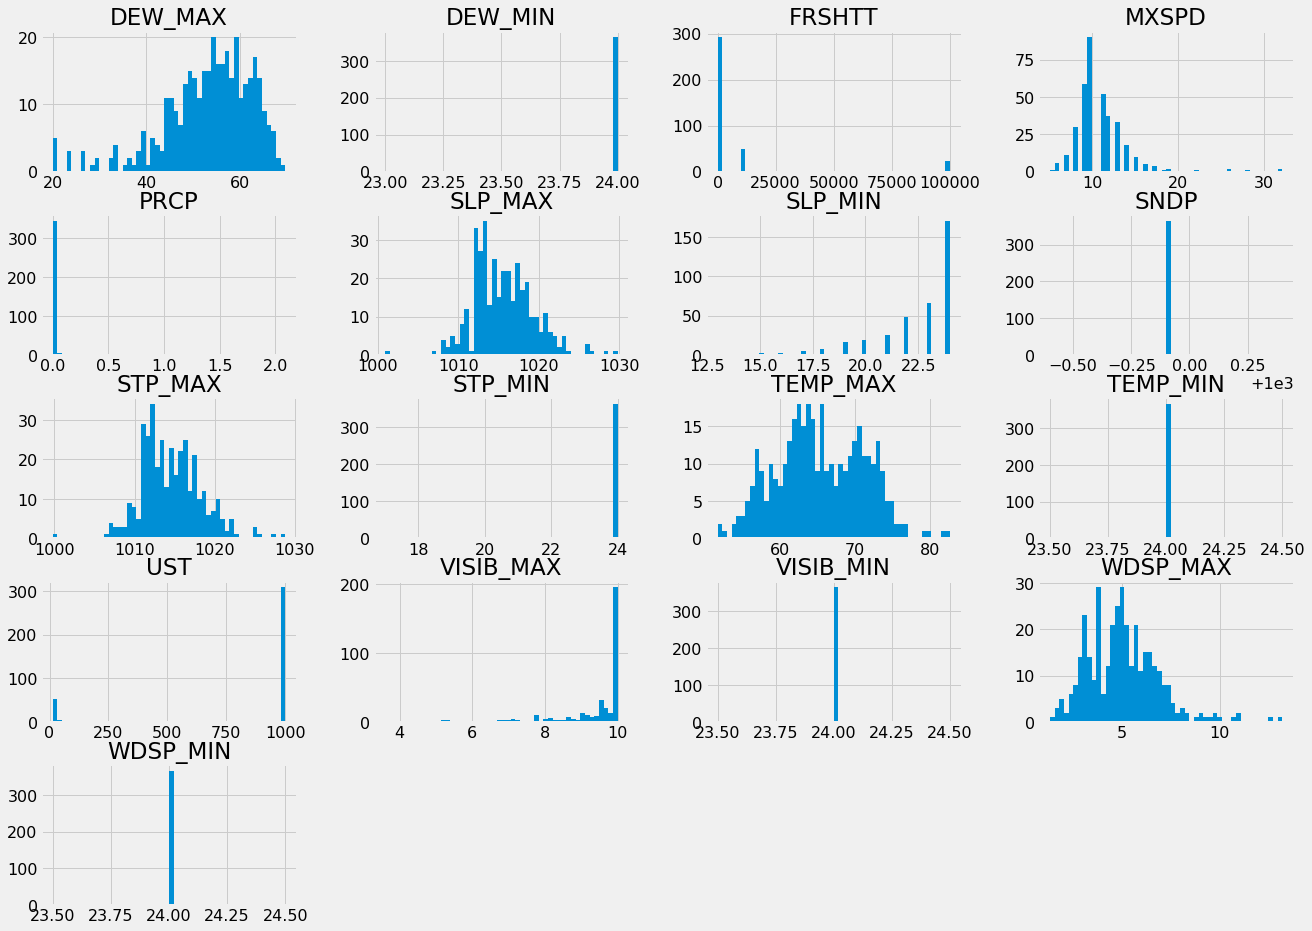

In [44]:
inputdata.hist(bins = 50, figsize = (20,15))
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(inputdata,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = 42)
print(len(train), "train +", len(test), "test")

255 train + 110 test


In [46]:
# Imputation of missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [47]:
inputdata.shape

(365, 17)

In [48]:
test.shape
train.shape

(255, 17)

In [49]:
# Features for feature importances
features = list(train.columns)

In [50]:
# Create the model with 100 trees
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [51]:
# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [52]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 60
Average maximum depth 11


In [53]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [54]:
# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [55]:
test

,TEMP_MAX,TEMP_MIN,DEW_MAX,DEW_MIN,SLP_MAX,SLP_MIN,STP_MAX,STP_MIN,VISIB_MAX,VISIB_MIN,WDSP_MAX,WDSP_MIN,MXSPD,UST,PRCP,SNDP,FRSHTT
170,69.1,24,63.0,24,1010.8,24,1009.8,24,8.6,24,7.3,24,12.0,999.9,0.00,999.9,0
27,55.2,24,23.2,24,1029.8,24,1028.8,24,10.0,24,3.3,24,9.9,999.9,0.00,999.9,0
13,56.7,24,47.6,24,1016.9,24,1016.0,24,10.0,24,3.9,24,8.9,999.9,0.26,999.9,10000
262,69.9,24,59.3,24,1012.5,23,1011.6,24,10.0,24,7.4,24,12.0,999.9,0.00,999.9,0
356,55.1,24,32.2,24,1023.1,24,1022.1,24,10.0,24,3.4,24,9.9,999.9,0.00,999.9,0
324,65.7,24,43.1,24,1016.9,24,1015.9,24,10.0,24,3.0,24,8.9,999.9,0.00,999.9,0
178,67.1,24,59.2,24,1012.3,19,1011.3,24,9.5,24,5.5,24,9.9,999.9,0.00,999.9,0
253,75.1,24,67.0,24,1012.1,24,1011.1,24,10.0,24,5.2,24,12.0,999.9,0.00,999.9,0
320,67.6,24,55.7,24,1016.5,24,1015.5,24,9.9,24,3.9,24,8.9,999.9,0.00,999.9,0
4,58.3,24,49.8,24,1018.2,19,1017.0,24,7.9,24,3.7,24,9.9,999.9,0.00,999.9,10000


In [56]:
rf_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [59]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 Test: 0.25 Train: 1.0
Precision Baseline: 0.11 Test: 0.75 Train: 1.0
Roc Baseline: 0.5 Test: 0.73 Train: 1.0


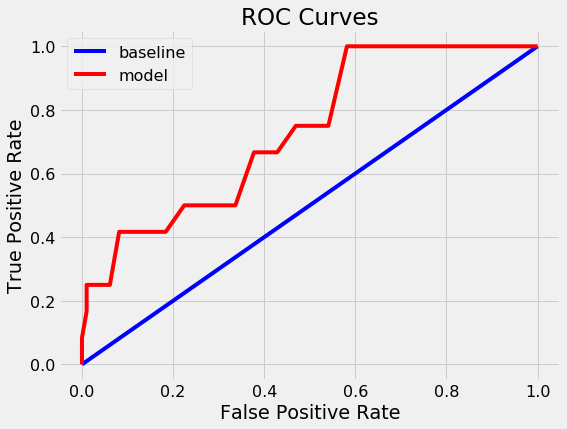

<Figure size 432x288 with 0 Axes>

In [60]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

In [61]:
from sklearn.metrics import confusion_matrix
import itertools

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[97  1]
 [ 9  3]]


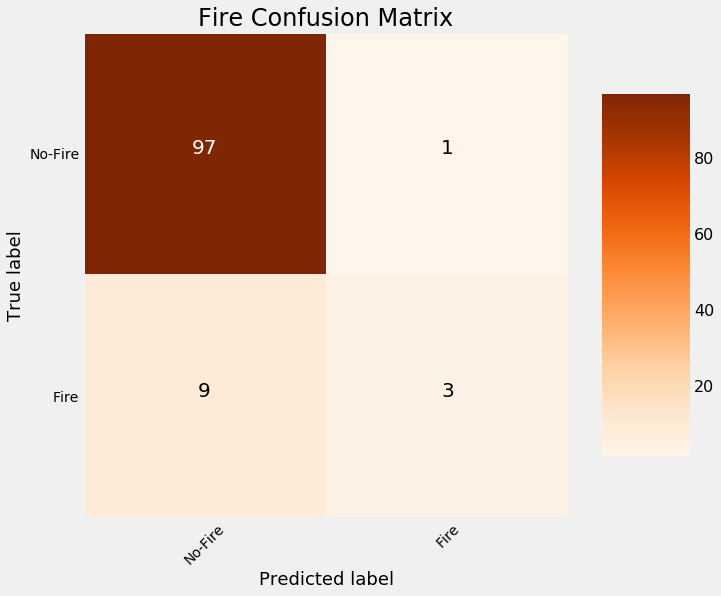

In [63]:
# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['No-Fire', 'Fire'],
                      title = 'Fire Confusion Matrix')

plt.savefig('cm.png')

In [64]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(test_labels, rf_probs)

In [65]:
roc_value

0.7325680272108843

In [66]:
#Feature Importance
# Extract feature importances
fi = pd.DataFrame({'feature': list(train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

,feature,importance
0,TEMP_MAX,0.250300
2,DEW_MAX,0.153189
10,WDSP_MAX,0.126612
4,SLP_MAX,0.111229
6,STP_MAX,0.107005


In [67]:
#Saving the model

import pickle

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model)

In [68]:
# Load the pickled model 
rf_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
rf_from_pickle.predict(test) 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
#Saving model in binary file

with open('RF_model_pickle','wb') as file:
    pickle.dump(model, file)